In [ ]:
from google.colab import drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from glob import glob


In [ ]:
IMAGE_SIZE=[224,224]


In [ ]:
train_path="/content/drive/MyDrive/TOMATOFOLDER/processed_data/train"
test_path="/content/drive/MyDrive/TOMATOFOLDER/processed_data/val"

In [ ]:
folders=glob("/content/drive/MyDrive/TOMATOFOLDER/processed_data/train/*")
folders

['/content/drive/MyDrive/TOMATOFOLDER/processed_data/train/Tomato___healthy',
 '/content/drive/MyDrive/TOMATOFOLDER/processed_data/train/Tomato___Target_Spot',
 '/content/drive/MyDrive/TOMATOFOLDER/processed_data/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/drive/MyDrive/TOMATOFOLDER/processed_data/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/MyDrive/TOMATOFOLDER/processed_data/train/Tomato___Late_blight',
 '/content/drive/MyDrive/TOMATOFOLDER/processed_data/train/Tomato___Leaf_Mold',
 '/content/drive/MyDrive/TOMATOFOLDER/processed_data/train/Tomato___Early_blight',
 '/content/drive/MyDrive/TOMATOFOLDER/processed_data/train/Tomato___Tomato_mosaic_virus',
 '/content/drive/MyDrive/TOMATOFOLDER/processed_data/train/Tomato___Septoria_leaf_spot',
 '/content/drive/MyDrive/TOMATOFOLDER/processed_data/train/Tomato___Bacterial_spot']

In [ ]:
len(folders)

10

In [ ]:
folder=glob("/content/drive/MyDrive/TOMATOFOLDER/processed_data/val/*")
folder

['/content/drive/MyDrive/TOMATOFOLDER/processed_data/val/Tomato___healthy',
 '/content/drive/MyDrive/TOMATOFOLDER/processed_data/val/Tomato___Target_Spot',
 '/content/drive/MyDrive/TOMATOFOLDER/processed_data/val/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/drive/MyDrive/TOMATOFOLDER/processed_data/val/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/MyDrive/TOMATOFOLDER/processed_data/val/Tomato___Late_blight',
 '/content/drive/MyDrive/TOMATOFOLDER/processed_data/val/Tomato___Leaf_Mold',
 '/content/drive/MyDrive/TOMATOFOLDER/processed_data/val/Tomato___Early_blight',
 '/content/drive/MyDrive/TOMATOFOLDER/processed_data/val/Tomato___Tomato_mosaic_virus',
 '/content/drive/MyDrive/TOMATOFOLDER/processed_data/val/Tomato___Septoria_leaf_spot',
 '/content/drive/MyDrive/TOMATOFOLDER/processed_data/val/Tomato___Bacterial_spot']

In [ ]:
vgg19=VGG19(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

80142336/80134624 [==============================] - 1s 0us/step


In [ ]:
for layer in vgg19.layers:
  layer.trainable=False

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg19.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
optimizer=RMSprop(0.001)
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
#Data augmentation
test_datagen=ImageDataGenerator(rescale=1./255)
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 rotation_range=40,
                                 horizontal_flip=True)
training_set=train_datagen.flow_from_directory(
    "/content/drive/MyDrive/TOMATOFOLDER/processed_data/train",
    class_mode="categorical",
    target_size=IMAGE_SIZE,
    batch_size=32
)
test_set=test_datagen.flow_from_directory(
    "/content/drive/MyDrive/TOMATOFOLDER/processed_data/val",
    class_mode='categorical',
    target_size=IMAGE_SIZE,
    batch_size=32
)

Found 11243 images belonging to 10 classes.
Found 4825 images belonging to 10 classes.


In [ ]:
# fit the model
es = EarlyStopping(patience=20, restore_best_weights=True)

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=es
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
352/352 [==============================] - 171s 487ms/step - loss: 0.5819 - accuracy: 0.8585 - val_loss: 0.4861 - val_accuracy: 0.8947
Epoch 2/20
352/352 [==============================] - 172s 488ms/step - loss: 0.5522 - accuracy: 0.8604 - val_loss: 0.6990 - val_accuracy: 0.8524
Epoch 3/20
352/352 [==============================] - 172s 488ms/step - loss: 0.5318 - accuracy: 0.8694 - val_loss: 0.7796 - val_accuracy: 0.8257
Epoch 4/20
352/352 [==============================] - 173s 491ms/step - loss: 0.5067 - accuracy: 0.8778 - val_loss: 0.6497 - val_accuracy: 0.8512
Epoch 5/20
352/352 [==============================] - 172s 488ms/step - loss: 0.5266 - accuracy: 0.8762 - val_loss: 0.7800 - val_accuracy: 0.8415
Epoch 6/20
352/352 [==============================] - 171s 487ms/step - loss: 0.5100 - accuracy: 0.8727 - val_loss: 0.7825 - val_accuracy: 0.8421
Epoch 7/20
352/352 [==============================] - 172s 489ms/step - loss: 0.5187 - accuracy: 0.8765 - val_loss: 1.2133 -

In [ ]:
valid_loss, valid_acc = model.evaluate_generator(test_set, steps=len(test_set))
print(f"Final validation accuracy: {valid_acc*100:.2f}%")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Final validation accuracy: 88.58%


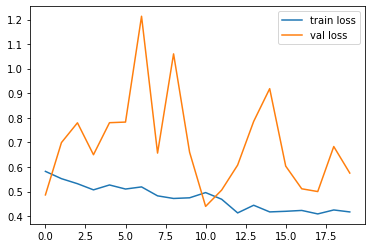

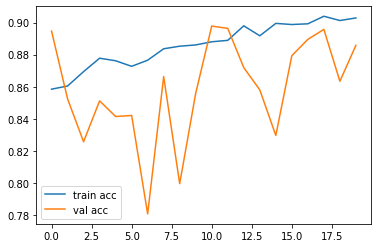

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('Acc-Val_acc')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([3, 9, 5, ..., 2, 2, 5])

In [ ]:
loss, accuracy = model.evaluate(test_set)

151/151 [==============================] - 24s 160ms/step - loss: 0.5750 - accuracy: 0.8858


In [ ]:
#save the tflite model
export_dir = 'Final_tommato2020/saved_model/'
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: Final_tommato2020/saved_model/assets


In [ ]:
#optimize the model for inference
mode = "Storage"

if mode == 'Storage':
  optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
  optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
  optimization = tf.lite.Optimize.DEFAULT
  
optimization

<Optimize.OPTIMIZE_FOR_SIZE: 'OPTIMIZE_FOR_SIZE'>

In [ ]:
#convert the model
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
converter.optimizations = [optimization]
tflite_model = converter.convert()

In [ ]:
# Save the converted model tflite file
tflite_model_file = 'Final_tommato_classifier_2021.tflite'

with open(tflite_model_file, 'wb') as f:
    f.write(tflite_model)



In [ ]:

CLASS_NAMES = ['Tomato___healthy',
'Tomato___Target_Spot',
'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
'Tomato___Spider_mites Two-spotted_spider_mite',
'Tomato___Late_blight',
'Tomato___Leaf_Mold',
'Tomato___Early_blight',
'Tomato___Tomato_mosaic_virus',
'Tomato___Septoria_leaf_spot',
'Tomato___Bacterial_spot'
]

In [ ]:


with open('Final_tomato_2021_labels.txt', 'w') as f:
  f.write('\n'.join(CLASS_NAMES))
  
!ls

Acc-Val_acc.png		      Final_tommato2020			    sample_data
drive			      Final_tommato_classifier_2021.tflite
Final_tomato_2021_labels.txt  LossVal_loss.png


In [ ]:


"""with open('Final_tomato_classifier_labels.txt', 'w') as f:
  f.write('\n'.join(CLASS_NAMES))

!ls"""